# Loading DATA

In [2]:
import numpy as np 
import pandas as pd 
import random 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
                              "Dynamic\nPromo ID","Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]


## Converting object columns to numerical
def convert_to_float(x):
  if x=="" or x in numerical_convertible_columns:
    return 0
  return float(x.replace(',',''))

##Removing % sign from Gross Margin Column Data
def p2f(x):
  if x=='' or x == "Gross Margin " or x == "Gross Margin %":
    return 0
  temp = x.strip('%') if x[-1] == "%" else x
  return float(temp.replace(',',''))

##Removing $ or () sign from Actual-Retail Column Data
def dollar_to_float(x):
  if x=="" or x == "Actual-Retail" or x == "Dynamic\nPromo ID" or x == "Dynamic Promo ID":
    return 0
  temp = x.strip(')') if x[-1] == ")" else x
  temp = temp[1:]  if temp[0] == '(' else temp
  temp = temp[1:]  if temp[0] == '$' else temp
  if x[0] == "-":
    return -1* dollar_to_float(temp[1:])
  else:
    return float(temp.replace(',',''))

In [4]:
data1718 = pd.read_csv("costello_ace_2017-2018.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data1718.shape

(17328044, 39)

In [6]:
data1718.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,...,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
17328039,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901105411,10541,"PALMYRA PUSHBROOM 18""",1.0,...,7.29,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,2.0,Sale,Category Price Plan,NaN
17328040,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,82901121725,12172,WIRE BRUSH MINI SS 3PK,1.0,...,3.78,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,3.0,Sale,Category Price Plan,NaN
17328041,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,41785997888,1455567,BRUSH SCRUB HANG-UP,1.0,...,1.56,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,4.0,Sale,Category Price Plan,NaN
17328042,9/30/2018,20:07:23,99989,474,a,16791 STATEN ISLAND,8.2091E+11,2301166,CM SLIDE LOCK KNIFE,1.0,...,4.82,NaN,NaN,1.98215e+09,ANASTASIA ZIZIAK,Sale,5.0,Sale,Category Price Plan,NaN
17328043,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [7]:
data1516 = pd.read_csv("costello_ace_2015-2016.csv", 
                         thousands=',', converters={'Gross Margin %':p2f, 'Actual-Retail': dollar_to_float,
                                                    'Net Sales Units' : convert_to_float, 
                                                    "Net Sales" : convert_to_float, "Cost" : convert_to_float, 
                                                    "Gross Margin" :convert_to_float, "Item was Scanned": convert_to_float,
                              "Dynamic Promo ID": convert_to_float, "Actual Price":convert_to_float, 
                              "Retail Price":convert_to_float, "$ Off Retail":convert_to_float, "Line #":convert_to_float})

In [8]:
data1516.shape

(15627499, 39)

In [9]:
pd.set_option('display.max_columns',
              500)

data1516.tail()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
15627494,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,51643061880,8009730,"CORD STRETCH 48"" HVY DTY",1.0,2.10,1.68,0.42,20.00,80,SPORTING GOODS,856,STRETCH CORDS/TARP STRAPS,85601,STRETCH CORDS/HOOKS,1.0,NaN,NaN,0.0,2.10,5.99,3.89,Y,Alternate Tender,3.89,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,1.0,Sale,Category Price Plan,NaN
15627495,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,82901731900,73190,TARP POLY BLUE/BRN 6X8,1.0,3.06,2.45,0.61,19.93,70,"LAWN, GARDEN & FARM SUPPLIES",774,TARPS,77401,POLY TARPS,1.0,NaN,NaN,0.0,3.06,7.99,4.93,Y,Alternate Tender,4.93,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,2.0,Sale,Category Price Plan,NaN
15627496,9/30/2016,21:14:44,500868,I38056,3,3164 NESCONSET,42854024986,1365527,SPRAYER ORBITAL 24 OZ,1.0,2.00,1.60,0.40,20.00,10,CLEANING SUPPLIES,105,GLASS/PLASTIC CLEANERS,10505,SPRAYERS,1.0,NaN,NaN,0.0,2.00,3.99,1.99,Y,Alternate Tender,1.99,11787,NaN,1.98164e+09,ANDRIY CHEVEVAN,Sale,3.0,Sale,Category Price Plan,NaN
15627497,9/30/2016,21:29:00,507179,B84423,S,16147 CALDWELL,49000007640,CO5964,SPRITE 20OZ,1.0,1.19,0.95,0.24,20.17,9,SODA/ETC,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,1.19,1.99,0.80,Y,Alternate Tender,0.80,7063,NaN,1.9818e+09,GEORGE TAYLOR,Sale,1.0,Sale,Category Price Plan,NaN
15627498,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Cleaning Data

In [10]:
def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1516.index[data1516[column_name] == column_name].tolist()

rows_to_be_deleted_1 = [15627498]
for col in data1516.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_1)

print(len(np.unique(rows_to_be_deleted_1)))

def find_rows_having_values_as_their_column_names(column_name, rows_to_be_deleted):
  rows_to_be_deleted += data1718.index[data1718[column_name] == column_name].tolist()

rows_to_be_deleted_2 = [17328043]
for col in data1718.columns:
  find_rows_having_values_as_their_column_names(col, rows_to_be_deleted_2)

print(len(np.unique(rows_to_be_deleted_2)))

/usr/local/lib/python3.5/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


24
24


In [11]:
print(data1516.shape)
temp_df_1 = data1516.drop(rows_to_be_deleted_1)
print(temp_df_1.shape)

(15627499, 39)
(15627475, 39)


In [12]:
print(data1718.shape)
temp_df_2 = data1718.drop(rows_to_be_deleted_2)
print(temp_df_2.shape)

(17328044, 39)
(17328020, 39)


In [13]:
data1516 = temp_df_1
data1718 = temp_df_2

In [14]:
import gc
del temp_df_1, temp_df_2
gc.collect()

0

In [15]:
##Zip Code has 'NY'

# numerical_convertible_columns = ["Net Sales Units", "Net Sales", "Cost", "Gross Margin", "Item was Scanned",
#                               "Dynamic Promo ID", "Actual Price", "Retail Price", "$ Off Retail", "Line #"]

# def RepresentsInt(s):
#   try: 
#     train_data[s].astype(str).str.replace(",","").astype(float) 
#     return True
#   except Exception as e:
#     print(s)
#     print(str(e))
#     return False
# num =[]  
# for v in numerical_convertible_columns:
#   if RepresentsInt(v):
#     num.append(v)
# num

## CLEANING 2015-16

In [16]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Grand Summaries' does not match format '%m/%d/%Y' (match)


In [17]:
data1516.loc[data1516['Date'] == 'Grand Summaries']

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2198827,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5721680,Grand Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [18]:
# data1516.iloc[data1516['Date'] == 'Grand Summaries']
droplist = data1516.index[data1516['Date'] == 'Grand Summaries'].tolist()
print(droplist)

[2198827, 5721680]


In [19]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [20]:
droplist = data1516.index[data1516['Date'] == 'Count = 682060'].tolist()
print(droplist)

[2198828]


In [21]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [22]:
data1516.index[data1516['Date'] == 'Count = 682060'].tolist()

[]

In [23]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

time data 'Count = 483724' does not match format '%m/%d/%Y' (match)


In [24]:
droplist = data1516.index[data1516['Date'] == 'Count = 483724'].tolist()
print(droplist)

[5721681]


In [25]:
if len(droplist) != 0:
    data1516 = data1516.drop(droplist)

In [26]:
data1516.index[data1516['Date'] == 'Count = 483724'].tolist()

[]

In [27]:
try:
    pd.to_datetime(data1516['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

## CLEANING 2017-18

In [28]:
try:
    pd.to_datetime(data1718['Date'], format='%m/%d/%Y', errors='raise')
    # do something
except Exception as e:
    print(e)

## COMBINING DATAFRAMES 

In [29]:
frames = [data1516,data1718]
train_data = pd.concat(frames).reset_index(drop=True)

In [30]:
data1516.shape

(15627471, 39)

In [31]:
data1718.shape

(17328020, 39)

In [32]:
train_data.shape

(32955491, 39)

In [33]:
train_data.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
0,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05481X,REG SEL INT MATTE BS1 GL,3.0,119.97,82.29,37.68,31.41,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,1.0,Sale,Category Price Plan,NaN
1,4/1/2015,7:16:46,88806,4297,P,15784 EI PAINT,OTHER,B05482X,REG SEL INT MATTE BS2 GL,2.0,79.98,51.52,28.46,35.58,14,PAINT & PAINT SUPPLIES,161,LIQUID PAINT- NATIONAL,16101,INTERIOR PAINT,5.0,NaN,NaN,0.0,39.99,49.99,10.0,Y,Charge Tender,10.0,11703,NaN,1.98203e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Bankcard Tender,0.0,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN


In [34]:
train_data[train_data.index.duplicated()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [35]:
try:
  pd.to_datetime(train_data['Transaction Time'], format='%H:%M:%S', errors='raise')
except Exception as e:
  print(e)

In [36]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Customer Number         107
Scanned UPC          174798
Department Code          89
Class Code           429338
Class Name                3
Fineline Code       4126931
MIP Promo ID       27901181
Promo/Discount     25975311
Tender Type               1
Zip Code           10473835
Zip Plus-4         12815651
Loyalty ID         10324840
Clerk                   936
Pricing Source        50922
Return Code        31832090
dtype: int64

In [37]:
def find_cols():
  cat_columns = []
  num_columns = []
  for i in train_data.columns:
    if train_data[i].dtype=='object' :
      cat_columns.append(i)
    else:
      num_columns.append(i)
  print("-----------Numerical Columns------------")
  print(num_columns)
  print("----------Categorical Columns-----------")
  print(cat_columns)

find_cols()

-----------Numerical Columns------------
['Net Sales Units', 'Net Sales', 'Cost', 'Gross Margin', 'Gross Margin %', 'Item was Scanned', 'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail', '$ Off Retail', 'Line #']
----------Categorical Columns-----------
['Date', 'Transaction Time', 'Customer Number', 'Receipt Number', 'Store #', 'Store Name', 'Scanned UPC', 'Item Number', 'Item Description', 'Department Code', 'Department Name', 'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name', 'MIP Promo ID', 'Promo/Discount', 'Taxable', 'Tender Type', 'Zip Code', 'Zip Plus-4', 'Loyalty ID', 'Clerk', 'Item Type', 'Line Item Transaction Type', 'Pricing Source', 'Return Code']


In [38]:
import gc
del data1516, data1718
gc.collect()

0

# IMPUTING NANs

## Customer Number

In [39]:
train_data[train_data["Customer Number"]=="*5"]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
2,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901090779,2106912,BLADE CUTOFF 4.5X1/16MTL,4.0,11.96,3.48,8.48,70.90,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,1.0,Sale,Retail,NaN
3,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,8.85911E+11,2361640,CUT WHL4-1/2X.045 MTL,8.0,23.92,6.36,17.56,73.41,20,HAND TOOLS & TOOL ACCESSORIES,205,POWER SAW BLADES,20509,ABRASIVE CUTTING BLADES,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,2.0,Sale,Retail,NaN
4,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901265313,7315054,GLOVE LTHR PALM WRK 3PK,1.0,14.99,5.46,9.53,63.58,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,14.99,14.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,3.0,Sale,Retail,NaN
5,4/1/2015,7:30:16,*5,A03697,7,12168 WEST ISLIP,82901720836,72083,GLOVE LTHR PALM LG,1.0,4.99,2.10,2.89,57.92,70,"LAWN, GARDEN & FARM SUPPLIES",760,GLOVES/FOOTWEAR,76005,LEATHER WORK GLOVES,1.0,NaN,NaN,0.0,4.99,4.99,0.00,Y,Bankcard Tender,0.00,NaN,NaN,NaN,CHARLES GRAHAM,Sale,4.0,Sale,Retail,NaN
6,4/1/2015,7:31:55,*5,E89651,B,14252 ISLAND PARK,82901069294,1099332,SANDSPONG MED WEDG ACE,1.0,3.99,0.91,3.08,77.19,14,PAINT & PAINT SUPPLIES,150,HAND/POWER SANDING ABRASI,15003,HAND SANDING ACCESSORIES,1.0,NaN,NaN,0.0,3.99,3.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,GABRIELA PARATORE,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955463,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,3.0,2.67,1.07,1.60,59.93,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.89,0.00,0.89,Y,Alternate Tender,-0.89,NaN,NaN,NaN,SUSAN MAURICE,Sale,2.0,Sale,Manual Override,NaN
32955464,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,2.00,0.80,1.20,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,1.00,0.00,1.00,Y,Alternate Tender,-1.00,NaN,NaN,NaN,SUSAN MAURICE,Sale,3.0,Sale,Manual Override,NaN
32955465,9/30/2018,18:11:38,*5,A29053,G,14874 WEST BABYLON,OTHER,56,FASTENERS,2.0,0.98,0.39,0.59,60.20,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.49,0.00,0.49,Y,Alternate Tender,-0.49,NaN,NaN,NaN,SUSAN MAURICE,Sale,4.0,Sale,Manual Override,NaN
32955484,9/30/2018,18:21:20,*5,B02347,I,15110 GARDEN CITY PARK,76706844002,7104888,TRAP SPIDER & CRICKET PK,2.0,13.98,5.38,8.60,61.52,70,"LAWN, GARDEN & FARM SUPPLIES",750,INSECTICIDES/REPELLENTS,75004,INSECT BAITS/TRAPS,1.0,2082918,S,0.0,6.99,8.99,2.00,Y,Alternate Tender,2.00,NaN,NaN,NaN,MARK SMILOWITZ,Sale,1.0,Sale,Promotion,NaN


In [40]:
train_data["Customer Number"] = train_data["Customer Number"].fillna("*5")

In [41]:
train_data[train_data["Customer Number"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Store #

In [42]:
print(train_data["Store #"].unique().tolist())

['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']


In [43]:
len(train_data["Store Name"].unique().tolist())

32

## Scanned UPC

In [44]:
train_data[train_data["Scanned UPC"].str.isalpha()==True]['Scanned UPC'].unique()

array(['OTHER', 'QF', 'LOGS', 'AUTO', 'ROUNDUP', 'GGARDEN', 'GGIFT',
       'RAZZLE', 'ISMERCH', 'GSNOW', 'HARDBOARD', 'STDPINE', 'GPAINT',
       'GOURDS', 'HAYBALE', 'FBWETMOP', 'JGSOIL', 'SPECIAL'], dtype=object)

In [45]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Scanned UPC"].isnull()].tolist())]["Item Number"].unique().tolist()
scan = train_data[train_data["Item Number"].isin(item_nums)]["Scanned UPC"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, scan))
temp = train_data[train_data["Scanned UPC"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
69,4/1/2015,7:58:56,88820,4298,P,15784 EI PAINT,NaN,12992,PAINTBRS CHIP 1.5WT BRSL,4.0,5.72,0.83,4.89,85.49,14,PAINT & PAINT SUPPLIES,131,PAINT BRUSHES,13106,SINGLE USE/TOSS-AWAY,1.0,NaN,Q,0.0,1.43,1.79,0.36,Y,Charge Tender,0.36,11730,NaN,1.98202e+09,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Category Price Plan,NaN
130,4/1/2015,8:05:32,10000,A35835,P,15784 EI PAINT,NaN,1081249,SHERLOCK EXT POLE 2-4',1.0,31.49,14.14,17.35,55.10,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17111,EXTENSION POLES,1.0,NaN,NaN,0.0,31.49,34.99,3.50,Y,Bankcard Tender,3.50,NaN,NaN,1.98149e+09,MELISSA MOORMAN,Sale,3.0,Sale,Category Price Plan,NaN
369,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,73705834,.5 MIL 9X12 DROP 5PK,1.0,6.99,3.11,3.88,55.51,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1.0,NaN,NaN,0.0,6.99,6.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,1.0,Sale,Retail,NaN
370,4/1/2015,8:31:49,*5,A35840,P,15784 EI PAINT,NaN,1395151,"DELUXE METAL TRAY 11""",1.0,5.99,2.19,3.80,63.44,14,PAINT & PAINT SUPPLIES,171,PAINT ROLLERS,17110,TRAYS AND FRAMES,1.0,NaN,NaN,0.0,5.99,5.99,0.00,Y,Cash Tender,0.00,NaN,NaN,NaN,"HENRY ""HANK"" SCHURMAN",Sale,2.0,Sale,Retail,NaN
820,4/1/2015,9:10:22,*5,F19982,E,14664 NORTH MASSAPEQUA,NaN,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,6.00,2.40,3.60,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,1.0,NaN,NaN,0.0,6.00,0.00,6.00,Y,Cash Tender,-6.00,NaN,NaN,NaN,MICHELLE LYNAM STRIBULA,Sale,1.0,Sale,Manual Override,NaN


In [46]:
train_data[train_data["Scanned UPC"].isnull()]["Scanned UPC"] = temp["Item Number"].map(mapping)
train_data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(32955491, 39)

In [47]:
import gc
del temp
gc.collect()

0

## Item Number

In [48]:
train_data[train_data['Item Number']=="56"][['Item Number', 'Item Description', 'Scanned UPC']]

,Item Number,Item Description,Scanned UPC
54,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
55,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
56,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
90,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
91,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,OTHER
...,...,...,...
32955461,56,FASTENERS,OTHER
32955462,56,FASTENERS,OTHER
32955463,56,FASTENERS,OTHER
32955464,56,FASTENERS,OTHER


## Department Code

In [49]:
dept_names = train_data[train_data.index.isin(train_data.index[train_data["Department Code"].isnull()].tolist())]["Department Name"].unique().tolist()
dept_code = train_data[train_data["Department Name"].isin(dept_names)]["Department Code"].tolist()
dept = train_data[train_data["Department Name"].isin(dept_names)]["Department Name"].tolist()
mapping = dict(zip(dept, dept_code))
temp = train_data[train_data["Department Code"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
3422832,12/2/2016,9:37:34,*A94K5,I45809,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,21037,1957,1.90118e+09,UNKNOWN CLERK KMCPOS,Sale,4.0,Sale,Promotion,NaN
3423209,12/2/2016,9:47:34,*AC9TK,I45817,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21144,1907,1.93344e+09,UNKNOWN CLERK KMCPOS,Sale,3.0,Sale,Promotion,NaN
3468908,12/3/2016,11:44:14,*AB3Z5,I46680,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,50.0,0.01,49.99,99.98,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130B,S,200.0,50.0,0.0,50.0,Y,Bankcard Tender,-50.0,21035,2230,1.9222e+09,UNKNOWN CLERK AAMPOS,Sale,3.0,Sale,Promotion,NaN
3474239,12/3/2016,12:31:18,*AC2YH,I46795,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,20711,9672,1.92857e+09,UNKNOWN CLERK RMLPOS,Sale,4.0,Sale,Promotion,NaN
3490432,12/3/2016,14:48:58,*A96T6,I47083,Y,16663 EDGEWATER,OTHER,9316423,PROMOTIONAL GIFT CARD,1.0,20.0,0.01,19.99,99.95,NaN,BLANK,NaN,BLANK,NaN,BLANK,5.0,X161130C,S,201.0,20.0,0.0,20.0,Y,Bankcard Tender,-20.0,NaN,NaN,NaN,UNKNOWN CLERK AAMPOS,Sale,4.0,Sale,Promotion,NaN


In [50]:
mapping

{'BLANK': nan}

In [51]:
train_data["Department Code"] = train_data["Department Code"].fillna("NaN")

In [52]:
train_data[train_data["Department Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Name

In [53]:
item_nums = train_data[train_data.index.isin(train_data.index[train_data["Class Name"].isnull()].tolist())]["Item Number"].unique().tolist()
class_names = train_data[train_data["Item Number"].isin(item_nums)]["Class Name"].tolist()
items = train_data[train_data["Item Number"].isin(item_nums)]["Item Number"].tolist()
mapping = dict(zip(items, class_names))
temp = train_data[train_data["Class Name"].isnull()]
temp.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
21062605,2/2/2018,14:38:03,4250,18101,G,14874 WEST BABYLON,OTHER,1802628D,CARPET DRYER FAN 4.8A,1.0,251.99,163.20,88.79,35.24,10,CLEANING SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,251.99,279.99,28.0,Y,Charge Tender,28.0,11704,NaN,1.98173e+09,DOROTHY MARANO,Sale,1.0,Sale,Category Price Plan,NaN
24181335,7/30/2018,9:10:15,2045,I36840,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,30.59,15.25,15.34,50.15,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,30.59,33.99,3.4,N,Bankcard Tender,3.4,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,7.0,Sale,Category Price Plan,NaN
31472263,10/24/2018,11:10:39,2045,I43307,2,7504 GRAND BLVD,OTHER,1839141D,"TUCK POINT BLADE 4.5""",1.0,31.49,15.25,16.24,51.57,14,PAINT & PAINT SUPPLIES,180,NaN,18001,GAS POWERED RENTAL,5.0,NaN,NaN,0.0,31.49,34.99,3.5,N,Bankcard Tender,3.5,11729,NaN,1.98173e+09,TIMOTHY CONDRA,Sale,22.0,Sale,Category Price Plan,NaN


In [54]:
mapping

{'1802628D': nan, '1839141D': nan}

In [55]:
train_data["Class Name"] = train_data["Class Name"].fillna("NaN")

In [56]:
train_data[train_data["Class Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Class Code 

In [57]:
item_nums = train_data[train_data["Class Code"].isnull()]['Class Name'].unique().tolist()
item_nums

['BLANK']

In [58]:
train_data[train_data['Class Name']=='BLANK'].shape

(429338, 39)

In [59]:
train_data["Class Code"] = train_data["Class Code"].fillna("NaN")

In [60]:
train_data[train_data["Class Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Fineline Name

In [61]:
train_data[train_data["Fineline Name"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


In [62]:
train_data[train_data["Fineline Code"].isnull()].shape

(4126931, 39)

In [63]:
item_nums = train_data[train_data["Fineline Code"].isnull()]['Fineline Name'].unique().tolist()
item_nums

['BLANK']

In [64]:
train_data["Fineline Code"] = train_data["Fineline Code"].fillna("NaN")

In [65]:
train_data[train_data["Fineline Code"].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code


## Customer Number

In [66]:
len(train_data[train_data['Customer Number'].str.startswith('*')][train_data['Zip Code'].isnull()])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10300357

In [67]:
train_data[train_data['Customer Number']=='*5'][~train_data['Zip Code'].isnull()]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
190323,4/11/2015,11:34:42,*5,H78772,F,14822 NORTHPORT,7.2865E+11,4567756,"STEEL FIREPIT 26""",1.0,29.99,27.29,2.70,9.00,46,HEATING & COOLING SUPPLIES,456,PATIO HEATERS & FIREPITS,45602,OUTDOOR GAS FIREPITS,1.0,1150409,S,0.0,29.99,44.99,15.0,Y,Cash Tender,15.0,11729,4402,1.90591e+09,KATHLEEN GORNEY,Sale,1.0,Sale,Promotion,NaN
281154,4/14/2015,14:38:13,*5,F02120,B,14252 ISLAND PARK,OTHER,56,FASTENERS/SCREWS/NAILS/BOLTS ETC,1.0,0.10,0.04,0.06,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.10,0.00,0.1,Y,Cash Tender,-0.1,11729,4402,1.90591e+09,GABRIELA PARATORE,Sale,1.0,Sale,Manual Override,NaN
1891047,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,073187670120,8036592,HTH SUPER CLARIFIER QT,1.0,14.99,6.89,8.10,54.04,80,SPORTING GOODS,855,POOL CHEMICALS & MAINTENA,085501,POOL CHEMICALS,1.0,NaN,NaN,0.0,14.99,14.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,1.0,Sale,Retail,NaN
1891048,8/17/2016,15:55:26,*5,A75011,U,16354 LINCOLN PARK,855989006242,EA1173,MICRO NYLON WIRE 3'-ASST,1.0,4.99,2.00,2.99,59.92,30,"FLASHLIGHTS, LIGHTING & SUPPLIES",369,PHONE ACCESSORIES,036904,PHONE ACCESSORIES,1.0,NaN,NaN,0.0,4.99,4.99,0.0,Y,Alternate Tender,0.0,11729,4402,1.90591e+09,PATRICK RICHARDSON,Sale,2.0,Sale,Retail,NaN
2241706,8/2/2015,17:14:11,*5,G32659,B,14252 ISLAND PARK,77924074158,8212698,"QCC1 HOSE & REGULATOR21""",1.0,34.99,13.68,21.31,60.90,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86906,GAS GRILL PARTS,1.0,NaN,NaN,0.0,34.99,34.99,0.0,Y,Bankcard Tender,0.0,11729,4402,1.90591e+09,AMANDA COMPETIELLO,Sale,1.0,Sale,Retail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27360731,5/13/2017,16:15:50,*5,158827,Y,16663 EDGEWATER,OTHER,56,FASTENERS,1.0,0.00,0.00,0.00,0.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.00,0.00,0.0,Y,No Tender,0.0,11729,4402,1.90591e+09,LUKE ROLEN,Sale,1.0,Sale,Manual Override,NaN
28489593,5/21/2018,10:44:36,*5,J76940,W,16660 GLEN BURNIE,OTHER,700793,2CF RED COLORED MULCH,2.0,8.98,4.66,4.32,48.11,70,"LAWN, GARDEN & FARM SUPPLIES",746,BAG PRODUCTS,74610,DECO MULCH - LARGE BAG,5.0,NaN,NaN,0.0,4.49,4.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,CECILIA FINSTAD,Sale,1.0,Sale,Retail,NaN
28882584,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098439,2340495,"HAMMER BIT 1/8""X1-1/2""X3",1.0,8.49,4.12,4.37,51.47,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,1.0,Sale,Retail,NaN
28882586,11/4/2017,12:11:12,*5,D01093,7,12168 WEST ISLIP,45242098514,2339968,"HAMMER BIT 5/16""X4""X6""",1.0,8.49,3.18,5.31,62.54,20,HAND TOOLS & TOOL ACCESSORIES,252,POWER DRILL BITS,25202,MASONRY/GLASS BITS,1.0,NaN,NaN,0.0,8.49,8.49,0.0,Y,Cash Tender,0.0,11729,4402,1.90591e+09,FRANK MENDOLIA,Sale,2.0,Sale,Retail,NaN


## Clerk

In [68]:
train_data[train_data['Clerk'].isnull()]

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code
24235995,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,8.43518E+11,81960,BBQ TOOL SET 3PC SS/WOOD,1.0,9.41,7.84,1.57,16.68,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86901,BBQ TOOL SETS,1.0,NaN,NaN,0.0,9.41,17.99,8.58,Y,Bankcard Tender,8.58,11702,NaN,1.98149e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
24235996,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,7.83988E+11,8395568,PIGS ASS RUB SEASON6.5OZ,1.0,4.97,4.14,0.83,16.70,88,OUTDOOR LIVING & FURNITURE,869,BBQ TOOLS/PARTS/ACCS,86909,NO LONGER IN USE,1.0,NaN,NaN,0.0,4.97,7.99,3.02,N,Bankcard Tender,3.02,11702,NaN,1.98149e+09,NaN,Sale,2.0,Sale,Category Price Plan,NaN
24235997,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,32076894184,3013349,"STAPLE COAXL WH 1/4""CD50",1.0,1.69,1.41,0.28,16.57,34,ELECTRICAL SUPPLIES,316,STRAPS/STAPLES/CONNECTORS,31604,STAPLES,1.0,NaN,NaN,0.0,1.69,5.99,4.30,Y,Bankcard Tender,4.30,11702,NaN,1.98149e+09,NaN,Sale,3.0,Sale,Category Price Plan,NaN
24235998,6/1/2017,13:08:29,500717,I82267,G,14874 WEST BABYLON,82901001898,4008561,RING WAX EXTENDER KIT,1.0,4.63,3.85,0.78,16.85,40,PLUMBING SUPPLIES & FIXTURES,409,TOILET REPAIR,40901,WAX GASKET RINGS,1.0,NaN,NaN,0.0,4.63,8.99,4.36,Y,Bankcard Tender,4.36,11702,NaN,1.98149e+09,NaN,Sale,4.0,Sale,Category Price Plan,NaN
24236070,6/1/2017,13:09:59,509135,I82269,G,14874 WEST BABYLON,6.1127E+11,9274655,RED BULL ENRGY DRNK 12OZ,1.0,2.59,2.16,0.43,16.60,94,NOTIONS & MISCELLANEOUS,927,CANDY AND FOODS,92706,BEVERAGES,1.0,NaN,NaN,0.0,2.59,4.19,1.60,Y,Cash Tender,1.60,11726,NaN,1.9818e+09,NaN,Sale,1.0,Sale,Category Price Plan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27844143,5/30/2017,10:48:37,*5,I81641,G,14874 WEST BABYLON,OTHER,56,FASTENERS,1.0,0.30,0.12,0.18,60.00,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5.0,NaN,NaN,0.0,0.30,0.00,0.30,Y,Cash Tender,-0.30,NaN,NaN,NaN,NaN,Sale,2.0,Sale,Manual Override,NaN
27844197,5/30/2017,10:50:28,202081,I81642,G,14874 WEST BABYLON,37155675746,4258141,CARTRIDGE MOEN PLSTC LL,-1.0,-19.99,-7.73,-12.26,61.33,40,PLUMBING SUPPLIES & FIXTURES,401,FAUCET PARTS,40101,STEMS,1.0,NaN,NaN,0.0,19.99,19.99,0.00,Y,Bankcard Tender,0.00,11704,7914,1.91582e+09,NaN,Return,1.0,Return,Return Validation,W
27844710,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-1.0,-2.99,-0.75,-2.24,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Defective,1.0,Defective,Return Validation,D
27844711,5/30/2017,11:06:52,198063,I81646,G,14874 WEST BABYLON,82901010517,5011887,TIP LEG PLST WHT1-1/4CD4,-2.0,-5.98,-1.50,-4.48,74.92,50,HARDWARE,540,FLOOR PROTECTION,54003,FURNITURE TIPS,1.0,NaN,NaN,0.0,2.99,2.99,0.00,Y,Bankcard Tender,0.00,11757,5416,1.91514e+09,NaN,Return,3.0,Return,Return Validation,W


In [69]:
train_data.columns

Index(['Date', 'Transaction Time', 'Customer Number', 'Receipt Number',
       'Store #', 'Store Name', 'Scanned UPC', 'Item Number',
       'Item Description', 'Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin', 'Gross Margin %', 'Department Code', 'Department Name',
       'Class Code', 'Class Name', 'Fineline Code', 'Fineline Name',
       'Item was Scanned', 'MIP Promo ID', 'Promo/Discount',
       'Dynamic Promo ID', 'Actual Price', 'Retail Price', 'Actual-Retail',
       'Taxable', 'Tender Type', '$ Off Retail', 'Zip Code', 'Zip Plus-4',
       'Loyalty ID', 'Clerk', 'Item Type', 'Line #',
       'Line Item Transaction Type', 'Pricing Source', 'Return Code'],
      dtype='object')

NameError: ("name 'flag_loyalty' is not defined", 'occurred at index 0')

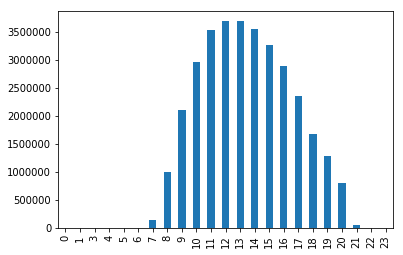

In [70]:
    # train_data['TransactionHr'] = train_data.apply(lambda row: 
    #             ((row['Transaction Time']//3600) % 24), axis = 1) 
    # train_data.head()

train_data['Transaction Time'] = pd.to_datetime(train_data['Transaction Time'])
train_data["Loyalty ID"] = train_data["Loyalty ID"].fillna("NaN")
train_data['hour'] = train_data['Transaction Time'].dt.hour 
train_data['hour'].value_counts().sort_index().plot.bar()
train_data['flag'] = train_data.apply(lambda row: flag_loyalty(row), axis =1)
ax = sns.countplot(x='hour',  hue='flag', data=train_data)
ax.set(xlabel = 'Hour of the day' , ylabel = 'Count', title = 'Count of Cusotmer Vists in Hour of a day')
plt.show()
# train_data_Ace.head()

In [71]:
def flag_loyalty(row):
    if row['Loyalty ID'] == 'NaN':
        return 'NON ACE'
    else:
        return 'ACE'

In [74]:
train_data["Loyalty ID"] = train_data["Loyalty ID"].fillna("NaN")
dummy = train_data[['Loyalty ID']]
dummy.head()
dummy['flag'] = dummy.apply(lambda row:flag_loyalty(row),axis=1)
dummy.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Loyalty ID,flag
0,1.98203e+09,ACE
1,1.98203e+09,ACE
2,NaN,NON ACE
3,NaN,NON ACE
4,NaN,NON ACE


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


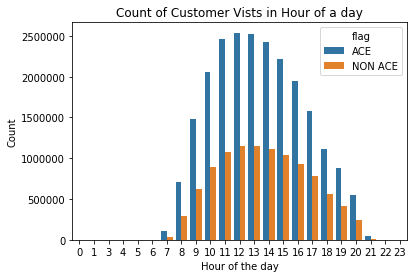

In [75]:
dummy['Transaction Time'] = pd.to_datetime(train_data['Transaction Time'])
dummy['hour'] = dummy['Transaction Time'].dt.hour 
ax = sns.countplot(x='hour',  hue='flag', data=dummy)
ax.set(xlabel = 'Hour of the day' , ylabel = 'Count', title = 'Count of Customer Vists in Hour of a day')
plt.show()

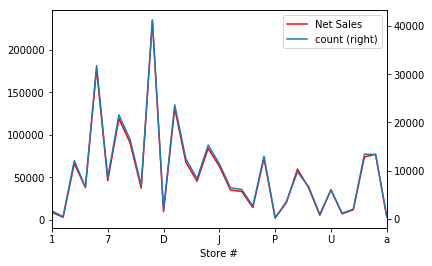

In [77]:
rmv = ['ACE REWARDS INSTANT SAVINGS', 'IN STORE COUPONS',
       'NON-ACE INSTANT SAVINGS',
       'GIFT CARD OFFSET (SPECL PROMO)']
	   
exp = train_data[train_data['Department Name'].isin(rmv)][['Customer Number','Receipt Number','Store #','Net Sales Units', 'Net Sales', 'Cost',
       'Gross Margin','Department Name','Class Name','Loyalty ID','Item Type','Pricing Source']]
	   
ace_reward_claims = (exp[exp['Class Name']=='REWARDS CARD'][exp[exp['Class Name']=='REWARDS CARD']['Loyalty ID']!="NaN"])

res = ace_reward_claims.groupby(['Store #','Receipt Number']).agg({'Net Sales': 'sum'}).reset_index()

ressave = res.groupby('Store #').agg({'Net Sales': 'sum'}).reset_index()
ressave['Net Sales'] = -ressave['Net Sales']

numacebystore = ace_reward_claims.groupby(['Store #','Loyalty ID']).size().reset_index().rename(columns={0:'count'})
numacebystore = numacebystore.groupby('Store #').agg({'count': 'sum'}).reset_index()

# print(numacebystore)
ressave['Norm'] = ressave['Net Sales']/numacebystore['count']
# print(ressave)

#plot
ax= plt.subplot(111)
ressave.plot( x='Store #', y = 'Net Sales', color = 'r',ax=ax)
numacebystore.plot(x = 'Store #', y ='count', ax=ax,secondary_y=True)


In [ ]:
ax = numacebystore.plot(x="Store #", y="count",kind = 'bar', legend=False)
ax2 = ax.twinx()
ressave.plot(x="Store #", y="Net Sales",  color = 'r', ax=ax2, legend=False)
ax.figure.legend()
plt.show()

In [ ]:
!cat /proc/sys/vm/overcommit_memory

In [ ]:
train_data_NonAce = train_data[train_data['Loyalty ID']=="NaN"]
# train_data_Ace = train_data.loc[train_data['Loyalty ID'] != 'NaN'] 
train_data_NonAce['hour'] = train_data_NonAce['Transaction Time'].dt.hour 
train_data_NonAce['hour'].value_counts().sort_index().plot.bar()

In [ ]:
train_data_Ace = train_data[train_data['Loyalty ID']!="NaN"]
# train_data_Ace = train_data.loc[train_data['Loyalty ID'] != 'NaN'] 
train_data_Ace['hour'] = train_data_Ace['Transaction Time'].dt.hour 
train_data_Ace['hour'].value_counts().sort_index().plot.bar()

# APRIORI

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='a']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
import gc
del test,df,rules
gc.collect()

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='V']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Q']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='R']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

NameError: name 'train_data' is not defined

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='U']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='S']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

# ['P', '7', 'B', 'L', '4', '9', '2', '6', 'I', '1', '3', 'X', 'O', 'F', 'G', '8', 'Y', 'J', 'K', 'S', 'A', 'E', 'M', 'W', 'D', 'U', 'T', 'R', 'Q', 'V', 'z', 'a']

non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='g']\
        .groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

In [ ]:
test.shape

In [ ]:
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import sys

In [ ]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [ ]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [ ]:
non_items_dept = ['ACE REWARDS INSTANT SAVINGS', 
       'IN STORE COUPONS',
       'LIPA INSTANT REBATE',
       'MISCELANEOUS SALES',
       'COSTELLOS GIFT CARD',
       'HHC COUPONS AND CERTIFICATES', 
      'GIFT CARD', 'DEPOSITS', 'LABOR',
       'GIFT CARD OFFSET (SPECL PROMO)', 
      'SPECIAL ORDER',
       'OTHER INCOME',
      'NON-ACE INSTANT SAVINGS', 'CREDIT CARD REFUND','MARKETING',
        'HHC MANUFACTURER COUPONS (TAXABL','RENTAL', 'PRO SHOW (B2B)',
        'UNIFORM','HELPFUL HARDWARE',
        'EXCHANGE CREDITS VENDOR FUNDED','GIFT CARDS', 
       'WARRANTY','STORE SERVICES (ACE)', 
       'HHC SERVICE DEPOSITS','ZIP CODE','RENT', 'DISPLAY/FIXTURE OVER $500 VALUE',
        'EBAY SHIPPING','COGS ADJ/PROMO COGS','MARKDOWNS','COMMERCIAL AND INDUSTRIAL']


def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

def set_order_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

def set_order_dyn_promo_store_df(name):
  orders = train_data[~train_data['Department Name'].isin(non_items_dept)][~train_data["Dynamic Promo ID"].isnull()]\
  [train_data['Dynamic Promo ID']>0][train_data['Store #']==name].set_index('Receipt Number')['Item Number'].rename('item_id')
  print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))
  return orders

In [ ]:
temp = train_data.groupby(['Item Number','Item Description']).size().reset_index().rename(columns={0:'count'})
temp = temp[['Item Number','Item Description']]
temp = temp.rename(columns={'Item Number':'item_id', 'Item Description':'item_name'})

In [ ]:
temp.head()

In [ ]:
orders = set_order_store_df("1")

In [ ]:
orders

In [ ]:
%%time
rules = association_rules(orders, 0.03)

In [ ]:
rules_final = merge_item_name(rules, temp).sort_values('lift', ascending=False)
display(rules_final[rules_final['itemA']!=rules_final['itemB']].head(10))

In [ ]:
train_data[train_data['Store #'] == '1'].groupby(['Receipt Number','Item Number'])['Net Sales Units'].sum().unstack()

In [ ]:
gc.collect()

In [ ]:
train_data[train_data['Store #'] == '1'].shape

In [ ]:
(train_data[train_data['Store #'] == '1'][~train_data['Department Name'].isin(non_items_dept)]).shape

In [ ]:
basket = unstacka(train_data[train_data['Store #'] == '1'][~train_data['Department Name'].isin(non_items_dept)].groupby(['Receipt Number','Item Number'])['Net Sales Units'].sum(),level=-1).reset_index().fillna(0)\
          .set_index('Receipt Number')

In [ ]:
basket.size

In [ ]:
!sudo pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules 
frq_items = apriori(basket.applymap(lambda x: 0 if x<=0 else 1), min_support = 0.1, use_colnames = True)

In [ ]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

In [ ]:
from functools import partial
import itertools

import numpy as np

import pandas._libs.algos as _algos
import pandas._libs.reshape as _reshape
from pandas._libs.sparse import IntIndex

from pandas.core.dtypes.cast import maybe_promote
from pandas.core.dtypes.common import (
    ensure_platform_int,
    is_bool_dtype,
    is_extension_array_dtype,
    is_integer,
    is_integer_dtype,
    is_list_like,
    is_object_dtype,
    needs_i8_conversion,
)
from pandas.core.dtypes.missing import notna

import pandas.core.algorithms as algos
from pandas.core.arrays import SparseArray
from pandas.core.arrays.categorical import _factorize_from_iterable
from pandas.core.frame import DataFrame
from pandas.core.index import Index, MultiIndex
from pandas.core.internals.arrays import extract_array
from pandas.core.series import Series
from pandas.core.sorting import (
    compress_group_index,
    decons_obs_group_ids,
    get_compressed_ids,
    get_group_index,
)


class _Unstacker:
    """
    Helper class to unstack data / pivot with multi-level index

    Parameters
    ----------
    values : ndarray
        Values of DataFrame to "Unstack"
    index : object
        Pandas ``Index``
    level : int or str, default last level
        Level to "unstack". Accepts a name for the level.
    value_columns : Index, optional
        Pandas ``Index`` or ``MultiIndex`` object if unstacking a DataFrame
    fill_value : scalar, optional
        Default value to fill in missing values if subgroups do not have the
        same set of labels. By default, missing values will be replaced with
        the default fill value for that data type, NaN for float, NaT for
        datetimelike, etc. For integer types, by default data will converted to
        float and missing values will be set to NaN.
    constructor : object
        Pandas ``DataFrame`` or subclass used to create unstacked
        response.  If None, DataFrame or SparseDataFrame will be used.

    Examples
    --------
    >>> index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
    ...                                    ('two', 'a'), ('two', 'b')])
    >>> s = pd.Series(np.arange(1, 5, dtype=np.int64), index=index)
    >>> s
    one  a    1
         b    2
    two  a    3
         b    4
    dtype: int64

    >>> s.unstack(level=-1)
         a  b
    one  1  2
    two  3  4

    >>> s.unstack(level=0)
       one  two
    a    1    3
    b    2    4

    Returns
    -------
    unstacked : DataFrame
    """

    def __init__(
        self,
        values,
        index,
        level=-1,
        value_columns=None,
        fill_value=None,
        constructor=None,
    ):

        if values.ndim == 1:
            values = values[:, np.newaxis]
        self.values = values
        self.value_columns = value_columns
        self.fill_value = fill_value

        if constructor is None:
            constructor = DataFrame
        self.constructor = constructor

        if value_columns is None and values.shape[1] != 1:  # pragma: no cover
            raise ValueError("must pass column labels for multi-column data")

        self.index = index.remove_unused_levels()

        self.level = self.index._get_level_number(level)

        # when index includes `nan`, need to lift levels/strides by 1
        self.lift = 1 if -1 in self.index.codes[self.level] else 0

        self.new_index_levels = list(self.index.levels)
        self.new_index_names = list(self.index.names)

        self.removed_name = self.new_index_names.pop(self.level)
        self.removed_level = self.new_index_levels.pop(self.level)
        self.removed_level_full = index.levels[self.level]

        # Bug fix GH 20601
        # If the data frame is too big, the number of unique index combination
        # will cause int32 overflow on windows environments.
        # We want to check and raise an error before this happens
        num_rows = np.max([index_level.size for index_level in self.new_index_levels])
        num_columns = self.removed_level.size

        # GH20601: This forces an overflow if the number of cells is too high.
        num_cells = np.multiply(num_rows, num_columns, dtype=np.int64)

        if num_rows > 0 and num_columns > 0 and num_cells <= 0:
            raise ValueError(
                "Unstacked DataFrame is too big, " "causing int32 overflow"
            )

        self._make_sorted_values_labels()
        self._make_selectors()

    def _make_sorted_values_labels(self):
        v = self.level

        codes = list(self.index.codes)
        levs = list(self.index.levels)
        to_sort = codes[:v] + codes[v + 1 :] + [codes[v]]
        sizes = [len(x) for x in levs[:v] + levs[v + 1 :] + [levs[v]]]

        comp_index, obs_ids = get_compressed_ids(to_sort, sizes)
        ngroups = len(obs_ids)

        indexer = _algos.groupsort_indexer(comp_index, ngroups)[0]
        indexer = ensure_platform_int(indexer)

        self.sorted_values = algos.take_nd(self.values, indexer, axis=0)
        self.sorted_labels = [l.take(indexer) for l in to_sort]

    def _make_selectors(self):
        new_levels = self.new_index_levels

        # make the mask
        remaining_labels = self.sorted_labels[:-1]
        level_sizes = [len(x) for x in new_levels]

        comp_index, obs_ids = get_compressed_ids(remaining_labels, level_sizes)
        ngroups = len(obs_ids)

        comp_index = ensure_platform_int(comp_index)
        stride = self.index.levshape[self.level] + self.lift
        self.full_shape = ngroups, stride

        selector = self.sorted_labels[-1] + stride * comp_index + self.lift
        mask = np.zeros(np.prod(self.full_shape), dtype=bool)
        mask.put(selector, True)

        if mask.sum() < len(self.index):
            raise ValueError("Index contains duplicate entries, " "cannot reshape")

        self.group_index = comp_index
        self.mask = mask
        self.unique_groups = obs_ids
        self.compressor = comp_index.searchsorted(np.arange(ngroups))

    def get_result(self):
        values, _ = self.get_new_values()
        columns = self.get_new_columns()
        index = self.get_new_index()

        return self.constructor(values, index=index, columns=columns)

    def get_new_values(self):
        values = self.values

        # place the values
        length, width = self.full_shape
        stride = values.shape[1]
        result_width = width * stride
        result_shape = (length, result_width)
        mask = self.mask
        mask_all = mask.all()

        # we can simply reshape if we don't have a mask
        if mask_all and len(values):
            new_values = (
                self.sorted_values.reshape(length, width, stride)
                .swapaxes(1, 2)
                .reshape(result_shape)
            )
            new_mask = np.ones(result_shape, dtype=bool)
            return new_values, new_mask

        # if our mask is all True, then we can use our existing dtype
        if mask_all:
            dtype = values.dtype
            new_values = np.empty(result_shape, dtype=dtype)
        else:
            dtype, fill_value = maybe_promote(values.dtype, self.fill_value)
            new_values = np.empty(result_shape, dtype=dtype)
            new_values.fill(fill_value)

        new_mask = np.zeros(result_shape, dtype=bool)

        name = np.dtype(dtype).name
        sorted_values = self.sorted_values

        # we need to convert to a basic dtype
        # and possibly coerce an input to our output dtype
        # e.g. ints -> floats
        if needs_i8_conversion(values):
            sorted_values = sorted_values.view("i8")
            new_values = new_values.view("i8")
            name = "int64"
        elif is_bool_dtype(values):
            sorted_values = sorted_values.astype("object")
            new_values = new_values.astype("object")
            name = "object"
        else:
            sorted_values = sorted_values.astype(name, copy=False)

        # fill in our values & mask
        f = getattr(_reshape, "unstack_{name}".format(name=name))
        f(
            sorted_values,
            mask.view("u1"),
            stride,
            length,
            width,
            new_values,
            new_mask.view("u1"),
        )

        # reconstruct dtype if needed
        if needs_i8_conversion(values):
            new_values = new_values.view(values.dtype)

        return new_values, new_mask

    def get_new_columns(self):
        if self.value_columns is None:
            if self.lift == 0:
                return self.removed_level

            lev = self.removed_level
            return lev.insert(0, lev._na_value)

        stride = len(self.removed_level) + self.lift
        width = len(self.value_columns)
        propagator = np.repeat(np.arange(width), stride)
        if isinstance(self.value_columns, MultiIndex):
            new_levels = self.value_columns.levels + (self.removed_level_full,)
            new_names = self.value_columns.names + (self.removed_name,)

            new_codes = [lab.take(propagator) for lab in self.value_columns.codes]
        else:
            new_levels = [self.value_columns, self.removed_level_full]
            new_names = [self.value_columns.name, self.removed_name]
            new_codes = [propagator]

        # The two indices differ only if the unstacked level had unused items:
        if len(self.removed_level_full) != len(self.removed_level):
            # In this case, we remap the new codes to the original level:
            repeater = self.removed_level_full.get_indexer(self.removed_level)
            if self.lift:
                repeater = np.insert(repeater, 0, -1)
        else:
            # Otherwise, we just use each level item exactly once:
            repeater = np.arange(stride) - self.lift

        # The entire level is then just a repetition of the single chunk:
        new_codes.append(np.tile(repeater, width))
        return MultiIndex(
            levels=new_levels, codes=new_codes, names=new_names, verify_integrity=False
        )

    def get_new_index(self):
        result_codes = [lab.take(self.compressor) for lab in self.sorted_labels[:-1]]

        # construct the new index
        if len(self.new_index_levels) == 1:
            lev, lab = self.new_index_levels[0], result_codes[0]
            if (lab == -1).any():
                lev = lev.insert(len(lev), lev._na_value)
            return lev.take(lab)

        return MultiIndex(
            levels=self.new_index_levels,
            codes=result_codes,
            names=self.new_index_names,
            verify_integrity=False,
        )


def _unstack_multiple(data, clocs, fill_value=None):
    if len(clocs) == 0:
        return data

    # NOTE: This doesn't deal with hierarchical columns yet

    index = data.index

    clocs = [index._get_level_number(i) for i in clocs]

    rlocs = [i for i in range(index.nlevels) if i not in clocs]

    clevels = [index.levels[i] for i in clocs]
    ccodes = [index.codes[i] for i in clocs]
    cnames = [index.names[i] for i in clocs]
    rlevels = [index.levels[i] for i in rlocs]
    rcodes = [index.codes[i] for i in rlocs]
    rnames = [index.names[i] for i in rlocs]

    shape = [len(x) for x in clevels]
    group_index = get_group_index(ccodes, shape, sort=False, xnull=False)

    comp_ids, obs_ids = compress_group_index(group_index, sort=False)
    recons_codes = decons_obs_group_ids(comp_ids, obs_ids, shape, ccodes, xnull=False)

    if rlocs == []:
        # Everything is in clocs, so the dummy df has a regular index
        dummy_index = Index(obs_ids, name="__placeholder__")
    else:
        dummy_index = MultiIndex(
            levels=rlevels + [obs_ids],
            codes=rcodes + [comp_ids],
            names=rnames + ["__placeholder__"],
            verify_integrity=False,
        )

    if isinstance(data, Series):
        dummy = data.copy()
        dummy.index = dummy_index

        unstacked = dummy.unstack("__placeholder__", fill_value=fill_value)
        new_levels = clevels
        new_names = cnames
        new_codes = recons_codes
    else:
        if isinstance(data.columns, MultiIndex):
            result = data
            for i in range(len(clocs)):
                val = clocs[i]
                result = result.unstack(val)
                clocs = [v if i > v else v - 1 for v in clocs]

            return result

        dummy = data.copy()
        dummy.index = dummy_index

        unstacked = dummy.unstack("__placeholder__", fill_value=fill_value)
        if isinstance(unstacked, Series):
            unstcols = unstacked.index
        else:
            unstcols = unstacked.columns
        new_levels = [unstcols.levels[0]] + clevels
        new_names = [data.columns.name] + cnames

        new_codes = [unstcols.codes[0]]
        for rec in recons_codes:
            new_codes.append(rec.take(unstcols.codes[-1]))

    new_columns = MultiIndex(
        levels=new_levels, codes=new_codes, names=new_names, verify_integrity=False
    )

    if isinstance(unstacked, Series):
        unstacked.index = new_columns
    else:
        unstacked.columns = new_columns

    return unstacked


def unstacka(obj, level, fill_value=None):
    if isinstance(level, (tuple, list)):
        if len(level) != 1:
            # _unstack_multiple only handles MultiIndexes,
            # and isn't needed for a single level
            return _unstack_multiple(obj, level, fill_value=fill_value)
        else:
            level = level[0]

    # Prioritize integer interpretation (GH #21677):
    if not is_integer(level) and not level == "__placeholder__":
        level = obj.index._get_level_number(level)

    if isinstance(obj, DataFrame):
        if isinstance(obj.index, MultiIndex):
            return _unstack_frame(obj, level, fill_value=fill_value)
        else:
            return obj.T.stack(dropna=False)
    else:
        if is_extension_array_dtype(obj.dtype):
            return _unstack_extension_series(obj, level, fill_value)
        unstacker = _Unstacker(
            obj.values,
            obj.index,
            level=level,
            fill_value=fill_value,
            constructor=obj._constructor_expanddim,
        )
        return unstacker.get_result()


def _unstack_frame(obj, level, fill_value=None):
    if obj._is_mixed_type:
        unstacker = partial(
            _Unstacker, index=obj.index, level=level, fill_value=fill_value
        )
        blocks = obj._data.unstack(unstacker, fill_value=fill_value)
        return obj._constructor(blocks)
    else:
        unstacker = _Unstacker(
            obj.values,
            obj.index,
            level=level,
            value_columns=obj.columns,
            fill_value=fill_value,
            constructor=obj._constructor,
        )
        return unstacker.get_result()


def _unstack_extension_series(series, level, fill_value):
    """
    Unstack an ExtensionArray-backed Series.

    The ExtensionDtype is preserved.

    Parameters
    ----------
    series : Series
        A Series with an ExtensionArray for values
    level : Any
        The level name or number.
    fill_value : Any
        The user-level (not physical storage) fill value to use for
        missing values introduced by the reshape. Passed to
        ``series.values.take``.

    Returns
    -------
    DataFrame
        Each column of the DataFrame will have the same dtype as
        the input Series.
    """
    # Implementation note: the basic idea is to
    # 1. Do a regular unstack on a dummy array of integers
    # 2. Followup with a columnwise take.
    # We use the dummy take to discover newly-created missing values
    # introduced by the reshape.
    from pandas.core.reshape.concat import concat

    dummy_arr = np.arange(len(series))
    # fill_value=-1, since we will do a series.values.take later
    result = _Unstacker(
        dummy_arr, series.index, level=level, fill_value=-1
    ).get_result()

    out = []
    values = extract_array(series, extract_numpy=False)

    for col, indices in result.items():
        out.append(
            Series(
                values.take(indices.values, allow_fill=True, fill_value=fill_value),
                name=col,
                index=result.index,
            )
        )
    return concat(out, axis="columns", copy=False, keys=result.columns)


def stack(frame, level=-1, dropna=True):
    """
    Convert DataFrame to Series with multi-level Index. Columns become the
    second level of the resulting hierarchical index

    Returns
    -------
    stacked : Series
    """

    def factorize(index):
        if index.is_unique:
            return index, np.arange(len(index))
        codes, categories = _factorize_from_iterable(index)
        return categories, codes

    N, K = frame.shape

    # Will also convert negative level numbers and check if out of bounds.
    level_num = frame.columns._get_level_number(level)

    if isinstance(frame.columns, MultiIndex):
        return _stack_multi_columns(frame, level_num=level_num, dropna=dropna)
    elif isinstance(frame.index, MultiIndex):
        new_levels = list(frame.index.levels)
        new_codes = [lab.repeat(K) for lab in frame.index.codes]

        clev, clab = factorize(frame.columns)
        new_levels.append(clev)
        new_codes.append(np.tile(clab, N).ravel())

        new_names = list(frame.index.names)
        new_names.append(frame.columns.name)
        new_index = MultiIndex(
            levels=new_levels, codes=new_codes, names=new_names, verify_integrity=False
        )
    else:
        levels, (ilab, clab) = zip(*map(factorize, (frame.index, frame.columns)))
        codes = ilab.repeat(K), np.tile(clab, N).ravel()
        new_index = MultiIndex(
            levels=levels,
            codes=codes,
            names=[frame.index.name, frame.columns.name],
            verify_integrity=False,
        )

    if frame._is_homogeneous_type:
        # For homogeneous EAs, frame.values will coerce to object. So
        # we concatenate instead.
        dtypes = list(frame.dtypes.values)
        dtype = dtypes[0]

        if is_extension_array_dtype(dtype):
            arr = dtype.construct_array_type()
            new_values = arr._concat_same_type(
                [col._values for _, col in frame.items()]
            )
            new_values = _reorder_for_extension_array_stack(new_values, N, K)
        else:
            # homogeneous, non-EA
            new_values = frame.values.ravel()

    else:
        # non-homogeneous
        new_values = frame.values.ravel()

    if dropna:
        mask = notna(new_values)
        new_values = new_values[mask]
        new_index = new_index[mask]

    return frame._constructor_sliced(new_values, index=new_index)


def stack_multiple(frame, level, dropna=True):
    # If all passed levels match up to column names, no
    # ambiguity about what to do
    if all(lev in frame.columns.names for lev in level):
        result = frame
        for lev in level:
            result = stack(result, lev, dropna=dropna)

    # Otherwise, level numbers may change as each successive level is stacked
    elif all(isinstance(lev, int) for lev in level):
        # As each stack is done, the level numbers decrease, so we need
        #  to account for that when level is a sequence of ints
        result = frame
        # _get_level_number() checks level numbers are in range and converts
        # negative numbers to positive
        level = [frame.columns._get_level_number(lev) for lev in level]

        # Can't iterate directly through level as we might need to change
        # values as we go
        for index in range(len(level)):
            lev = level[index]
            result = stack(result, lev, dropna=dropna)
            # Decrement all level numbers greater than current, as these
            # have now shifted down by one
            updated_level = []
            for other in level:
                if other > lev:
                    updated_level.append(other - 1)
                else:
                    updated_level.append(other)
            level = updated_level

    else:
        raise ValueError(
            "level should contain all level names or all level "
            "numbers, not a mixture of the two."
        )

    return result


def _stack_multi_columns(frame, level_num=-1, dropna=True):
    def _convert_level_number(level_num, columns):
        """
        Logic for converting the level number to something we can safely pass
        to swaplevel:

        We generally want to convert the level number into a level name, except
        when columns do not have names, in which case we must leave as a level
        number
        """
        if level_num in columns.names:
            return columns.names[level_num]
        else:
            if columns.names[level_num] is None:
                return level_num
            else:
                return columns.names[level_num]

    this = frame.copy()

    # this makes life much simpler
    if level_num != frame.columns.nlevels - 1:
        # roll levels to put selected level at end
        roll_columns = this.columns
        for i in range(level_num, frame.columns.nlevels - 1):
            # Need to check if the ints conflict with level names
            lev1 = _convert_level_number(i, roll_columns)
            lev2 = _convert_level_number(i + 1, roll_columns)
            roll_columns = roll_columns.swaplevel(lev1, lev2)
        this.columns = roll_columns

    if not this.columns.is_lexsorted():
        # Workaround the edge case where 0 is one of the column names,
        # which interferes with trying to sort based on the first
        # level
        level_to_sort = _convert_level_number(0, this.columns)
        this = this.sort_index(level=level_to_sort, axis=1)

    # tuple list excluding level for grouping columns
    if len(frame.columns.levels) > 2:
        tuples = list(
            zip(
                *[
                    lev.take(level_codes)
                    for lev, level_codes in zip(
                        this.columns.levels[:-1], this.columns.codes[:-1]
                    )
                ]
            )
        )
        unique_groups = [key for key, _ in itertools.groupby(tuples)]
        new_names = this.columns.names[:-1]
        new_columns = MultiIndex.from_tuples(unique_groups, names=new_names)
    else:
        new_columns = unique_groups = this.columns.levels[0]

    # time to ravel the values
    new_data = {}
    level_vals = this.columns.levels[-1]
    level_codes = sorted(set(this.columns.codes[-1]))
    level_vals_used = level_vals[level_codes]
    levsize = len(level_codes)
    drop_cols = []
    for key in unique_groups:
        try:
            loc = this.columns.get_loc(key)
        except KeyError:
            drop_cols.append(key)
            continue

        # can make more efficient?
        # we almost always return a slice
        # but if unsorted can get a boolean
        # indexer
        if not isinstance(loc, slice):
            slice_len = len(loc)
        else:
            slice_len = loc.stop - loc.start

        if slice_len != levsize:
            chunk = this.loc[:, this.columns[loc]]
            chunk.columns = level_vals.take(chunk.columns.codes[-1])
            value_slice = chunk.reindex(columns=level_vals_used).values
        else:
            if frame._is_homogeneous_type and is_extension_array_dtype(
                frame.dtypes.iloc[0]
            ):
                dtype = this[this.columns[loc]].dtypes.iloc[0]
                subset = this[this.columns[loc]]

                value_slice = dtype.construct_array_type()._concat_same_type(
                    [x._values for _, x in subset.items()]
                )
                N, K = this.shape
                idx = np.arange(N * K).reshape(K, N).T.ravel()
                value_slice = value_slice.take(idx)

            elif frame._is_mixed_type:
                value_slice = this[this.columns[loc]].values
            else:
                value_slice = this.values[:, loc]

        if value_slice.ndim > 1:
            # i.e. not extension
            value_slice = value_slice.ravel()

        new_data[key] = value_slice

    if len(drop_cols) > 0:
        new_columns = new_columns.difference(drop_cols)

    N = len(this)

    if isinstance(this.index, MultiIndex):
        new_levels = list(this.index.levels)
        new_names = list(this.index.names)
        new_codes = [lab.repeat(levsize) for lab in this.index.codes]
    else:
        new_levels = [this.index]
        new_codes = [np.arange(N).repeat(levsize)]
        new_names = [this.index.name]  # something better?

    new_levels.append(level_vals)
    new_codes.append(np.tile(level_codes, N))
    new_names.append(frame.columns.names[level_num])

    new_index = MultiIndex(
        levels=new_levels, codes=new_codes, names=new_names, verify_integrity=False
    )

    result = frame._constructor(new_data, index=new_index, columns=new_columns)

    # more efficient way to go about this? can do the whole masking biz but
    # will only save a small amount of time...
    if dropna:
        result = result.dropna(axis=0, how="all")

    return result


def get_dummies(
    data,
    prefix=None,
    prefix_sep="_",
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
):
    """
    Convert categorical variable into dummy/indicator variables.

    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        If `columns` is None then all the columns with
        `object` or `category` dtype will be converted.
    sparse : bool, default False
        Whether the dummy-encoded columns should be backed by
        a :class:`SparseArray` (True) or a regular NumPy array (False).
    drop_first : bool, default False
        Whether to get k-1 dummies out of k categorical levels by removing the
        first level.

        .. versionadded:: 0.18.0

    dtype : dtype, default np.uint8
        Data type for new columns. Only a single dtype is allowed.

        .. versionadded:: 0.23.0

    Returns
    -------
    DataFrame
        Dummy-coded data.

    See Also
    --------
    Series.str.get_dummies : Convert Series to dummy codes.

    Examples
    --------
    >>> s = pd.Series(list('abca'))

    >>> pd.get_dummies(s)
       a  b  c
    0  1  0  0
    1  0  1  0
    2  0  0  1
    3  1  0  0

    >>> s1 = ['a', 'b', np.nan]

    >>> pd.get_dummies(s1)
       a  b
    0  1  0
    1  0  1
    2  0  0

    >>> pd.get_dummies(s1, dummy_na=True)
       a  b  NaN
    0  1  0    0
    1  0  1    0
    2  0  0    1

    >>> df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
    ...                    'C': [1, 2, 3]})

    >>> pd.get_dummies(df, prefix=['col1', 'col2'])
       C  col1_a  col1_b  col2_a  col2_b  col2_c
    0  1       1       0       0       1       0
    1  2       0       1       1       0       0
    2  3       1       0       0       0       1

    >>> pd.get_dummies(pd.Series(list('abcaa')))
       a  b  c
    0  1  0  0
    1  0  1  0
    2  0  0  1
    3  1  0  0
    4  1  0  0

    >>> pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)
       b  c
    0  0  0
    1  1  0
    2  0  1
    3  0  0
    4  0  0

    >>> pd.get_dummies(pd.Series(list('abc')), dtype=float)
         a    b    c
    0  1.0  0.0  0.0
    1  0.0  1.0  0.0
    2  0.0  0.0  1.0
    """
    from pandas.core.reshape.concat import concat
    from itertools import cycle

    dtypes_to_encode = ["object", "category"]

    if isinstance(data, DataFrame):
        # determine columns being encoded
        if columns is None:
            data_to_encode = data.select_dtypes(include=dtypes_to_encode)
        else:
            data_to_encode = data[columns]

        # validate prefixes and separator to avoid silently dropping cols
        def check_len(item, name):
            len_msg = (
                "Length of '{name}' ({len_item}) did not match the "
                "length of the columns being encoded ({len_enc})."
            )

            if is_list_like(item):
                if not len(item) == data_to_encode.shape[1]:
                    len_msg = len_msg.format(
                        name=name, len_item=len(item), len_enc=data_to_encode.shape[1]
                    )
                    raise ValueError(len_msg)

        check_len(prefix, "prefix")
        check_len(prefix_sep, "prefix_sep")

        if isinstance(prefix, str):
            prefix = cycle([prefix])
        if isinstance(prefix, dict):
            prefix = [prefix[col] for col in data_to_encode.columns]

        if prefix is None:
            prefix = data_to_encode.columns

        # validate separators
        if isinstance(prefix_sep, str):
            prefix_sep = cycle([prefix_sep])
        elif isinstance(prefix_sep, dict):
            prefix_sep = [prefix_sep[col] for col in data_to_encode.columns]

        if data_to_encode.shape == data.shape:
            # Encoding the entire df, do not prepend any dropped columns
            with_dummies = []
        elif columns is not None:
            # Encoding only cols specified in columns. Get all cols not in
            # columns to prepend to result.
            with_dummies = [data.drop(columns, axis=1)]
        else:
            # Encoding only object and category dtype columns. Get remaining
            # columns to prepend to result.
            with_dummies = [data.select_dtypes(exclude=dtypes_to_encode)]

        for (col, pre, sep) in zip(data_to_encode.items(), prefix, prefix_sep):
            # col is (column_name, column), use just column data here
            dummy = _get_dummies_1d(
                col[1],
                prefix=pre,
                prefix_sep=sep,
                dummy_na=dummy_na,
                sparse=sparse,
                drop_first=drop_first,
                dtype=dtype,
            )
            with_dummies.append(dummy)
        result = concat(with_dummies, axis=1)
    else:
        result = _get_dummies_1d(
            data,
            prefix,
            prefix_sep,
            dummy_na,
            sparse=sparse,
            drop_first=drop_first,
            dtype=dtype,
        )
    return result


def _get_dummies_1d(
    data,
    prefix,
    prefix_sep="_",
    dummy_na=False,
    sparse=False,
    drop_first=False,
    dtype=None,
):
    from pandas.core.reshape.concat import concat

    # Series avoids inconsistent NaN handling
    codes, levels = _factorize_from_iterable(Series(data))

    if dtype is None:
        dtype = np.uint8
    dtype = np.dtype(dtype)

    if is_object_dtype(dtype):
        raise ValueError("dtype=object is not a valid dtype for get_dummies")

    def get_empty_frame(data):
        if isinstance(data, Series):
            index = data.index
        else:
            index = np.arange(len(data))
        return DataFrame(index=index)

    # if all NaN
    if not dummy_na and len(levels) == 0:
        return get_empty_frame(data)

    codes = codes.copy()
    if dummy_na:
        codes[codes == -1] = len(levels)
        levels = np.append(levels, np.nan)

    # if dummy_na, we just fake a nan level. drop_first will drop it again
    if drop_first and len(levels) == 1:
        return get_empty_frame(data)

    number_of_cols = len(levels)

    if prefix is None:
        dummy_cols = levels
    else:

        # PY2 embedded unicode, gh-22084
        def _make_col_name(prefix, prefix_sep, level):
            fstr = "{prefix}{prefix_sep}{level}"
            return fstr.format(prefix=prefix, prefix_sep=prefix_sep, level=level)

        dummy_cols = [_make_col_name(prefix, prefix_sep, level) for level in levels]

    if isinstance(data, Series):
        index = data.index
    else:
        index = None

    if sparse:

        if is_integer_dtype(dtype):
            fill_value = 0
        elif dtype == bool:
            fill_value = False
        else:
            fill_value = 0.0

        sparse_series = []
        N = len(data)
        sp_indices = [[] for _ in range(len(dummy_cols))]
        mask = codes != -1
        codes = codes[mask]
        n_idx = np.arange(N)[mask]

        for ndx, code in zip(n_idx, codes):
            sp_indices[code].append(ndx)

        if drop_first:
            # remove first categorical level to avoid perfect collinearity
            # GH12042
            sp_indices = sp_indices[1:]
            dummy_cols = dummy_cols[1:]
        for col, ixs in zip(dummy_cols, sp_indices):
            sarr = SparseArray(
                np.ones(len(ixs), dtype=dtype),
                sparse_index=IntIndex(N, ixs),
                fill_value=fill_value,
                dtype=dtype,
            )
            sparse_series.append(Series(data=sarr, index=index, name=col))

        out = concat(sparse_series, axis=1, copy=False)
        return out

    else:
        dummy_mat = np.eye(number_of_cols, dtype=dtype).take(codes, axis=0)

        if not dummy_na:
            # reset NaN GH4446
            dummy_mat[codes == -1] = 0

        if drop_first:
            # remove first GH12042
            dummy_mat = dummy_mat[:, 1:]
            dummy_cols = dummy_cols[1:]
        return DataFrame(dummy_mat, index=index, columns=dummy_cols)


def make_axis_dummies(frame, axis="minor", transform=None):
    """
    Construct 1-0 dummy variables corresponding to designated axis
    labels

    Parameters
    ----------
    frame : DataFrame
    axis : {'major', 'minor'}, default 'minor'
    transform : function, default None
        Function to apply to axis labels first. For example, to
        get "day of week" dummies in a time series regression
        you might call::

            make_axis_dummies(panel, axis='major',
                              transform=lambda d: d.weekday())
    Returns
    -------
    dummies : DataFrame
        Column names taken from chosen axis
    """
    numbers = {"major": 0, "minor": 1}
    num = numbers.get(axis, axis)

    items = frame.index.levels[num]
    codes = frame.index.codes[num]
    if transform is not None:
        mapped_items = items.map(transform)
        codes, items = _factorize_from_iterable(mapped_items.take(codes))

    values = np.eye(len(items), dtype=float)
    values = values.take(codes, axis=0)

    return DataFrame(values, columns=items, index=frame.index)


def _reorder_for_extension_array_stack(arr, n_rows, n_columns):
    """
    Re-orders the values when stacking multiple extension-arrays.

    The indirect stacking method used for EAs requires a followup
    take to get the order correct.

    Parameters
    ----------
    arr : ExtensionArray
    n_rows, n_columns : int
        The number of rows and columns in the original DataFrame.

    Returns
    -------
    taken : ExtensionArray
        The original `arr` with elements re-ordered appropriately

    Examples
    --------
    >>> arr = np.array(['a', 'b', 'c', 'd', 'e', 'f'])
    >>> _reorder_for_extension_array_stack(arr, 2, 3)
    array(['a', 'c', 'e', 'b', 'd', 'f'], dtype='<U1')

    >>> _reorder_for_extension_array_stack(arr, 3, 2)
    array(['a', 'd', 'b', 'e', 'c', 'f'], dtype='<U1')
    """
    # final take to get the order correct.
    # idx is an indexer like
    # [c0r0, c1r0, c2r0, ...,
    #  c0r1, c1r1, c2r1, ...]
    idx = np.arange(n_rows * n_columns).reshape(n_columns, n_rows).T.ravel()
    return arr.take(idx)


In [ ]:
def unstacka(obj, level, fill_value=None):
    if isinstance(level, (tuple, list)):
        if len(level) != 1:
            # _unstack_multiple only handles MultiIndexes,
            # and isn't needed for a single level
            return _unstack_multiple(obj, level, fill_value=fill_value)
        else:
            level = level[0]

    # Prioritize integer interpretation (GH #21677):
    if not is_integer(level) and not level == "__placeholder__":
        level = obj.index._get_level_number(level)

    if isinstance(obj, DataFrame):
        if isinstance(obj.index, MultiIndex):
            return _unstack_frame(obj, level, fill_value=fill_value)
        else:
            return obj.T.stack(dropna=False)
    else:
        if is_extension_array_dtype(obj.dtype):
            return _unstack_extension_series(obj, level, fill_value)
        unstacker = _Unstacker(
            obj.values,
            obj.index,
            level=level,
            fill_value=fill_value,
            constructor=obj._constructor_expanddim,
        )
        return unstacker.get_result()


In [ ]:
!cat /proc/sys/vm/overcommit_memory

In [ ]:
# del basket
gc.collect()
# !cat /proc/meminfo | grep Mem

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

In [ ]:
!cat /proc/meminfo | grep Mem

In [ ]:
#######################Seasonal Apriori###########################
####################Seasonal Apriori#################
spring = [3, 4, 5]
summer = [6,7,8]
fall = [9,10,11]
winter = [1,2,12]

train_data['Date'] = pd.to_datetime(train_data['Date'])


from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='a']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:
#######################Seasonal Apriori###########################


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='a']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='a']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:





test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='a']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='V']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='V']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='V']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='V']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Q']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Q']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Q']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='Q']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='R']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='R']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='R']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='R']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='T']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='U']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='U']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='U']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='U']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='S']\
        [train_data['Date'].dt.month.isin(spring)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='S']\
        [train_data['Date'].dt.month.isin(summer)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='S']\
        [train_data['Date'].dt.month.isin(fall)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

In [ ]:


test = train_data[~train_data['Department Name'].isin(non_items_dept)][train_data['Store #']=='S']\
        [train_data['Date'].dt.month.isin(winter)].groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='Items')

dataset=[]

for index, row in test.iterrows():
    dataset.append(row['Items'])

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frq_items = fpgrowth(df, min_support=0.001, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

# SARIMA

In [ ]:
train_data = train_data[~train_data['Department Name'].isin(non_items_dept)]

In [ ]:
sum_df = train_data.groupby(['Item Description']).agg({'Gross Margin':'sum'})
sum_df = sum_df.sort_values('Gross Margin',ascending=False)
sum_df = sum_df[:10]
ax =plt.subplot()
sum_df.plot.bar(ax=ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Total Gross Margin')
ax.set_title('Top 10 Products with highest total gross margin')
plt.show()

In [ ]:
sales_count = train_data.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count = sales_count.sort_values('Net Sales Units',ascending=False)
sales_count = sales_count[:10]
ax = plt.subplot()
sales_count[:10].plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales')
plt.show()

In [ ]:
train_data_9  = train_data[train_data['Store #'] == '9']
train_data_T  = train_data[train_data['Store #'] == 'T']

In [ ]:
import datetime
datetime.date(2010, 6, 16).strftime("%V")

In [ ]:
x = pd.DatetimeIndex(train_data_9['Date']).weekofyear

In [ ]:
print(pd.unique(x))

In [ ]:
sales_count_9 = train_data_9.groupby(['Item Description']).agg({'Net Sales Units':'sum'})
sales_count_9 = sales_count_9.sort_values('Net Sales Units',ascending=False)
sales_count_9 = sales_count_9[:10]
ax = plt.subplot()
sales_count_9.plot.bar(ax = ax)
ax.set_xlabel('Item Description')
ax.set_ylabel('Net Sales Count')
ax.set_title('Top 10 Products with most number of sales for Store # 9')
plt.show()

In [ ]:
train_data_9['Month'] = pd.DatetimeIndex(train_data_9['Date']).month
train_data_9['Year'] = pd.DatetimeIndex(train_data_9['Date']).year
train_data_9['Week'] = pd.DatetimeIndex(train_data_9['Date']).weekofyear
train_data_T['Month'] = pd.DatetimeIndex(train_data_T['Date']).month
train_data_T['Year'] = pd.DatetimeIndex(train_data_T['Date']).year

In [ ]:
train_data_9_56  = train_data_9[train_data_9['Item Number'] == '56']
train_data_9_56_year = train_data_9_56.groupby('Year')
train_data_9_56_15 = train_data_9_56_year.get_group(2015)
train_data_9_56_16 = train_data_9_56_year.get_group(2016)
train_data_9_56_17 = train_data_9_56_year.get_group(2017)
# train_year_17_T['Item Number'].value_counts()
train_data_9_56_18 = train_data_9_56_year.get_group(2018)
# train_year_18_T['Item Number'].value_counts()


In [ ]:
monthcount_15 = train_data_9_56_15.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Month'] = train_data_9_56_16['Month'] + 12
monthcount_16 = train_data_9_56_16.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Month'] = train_data_9_56_17['Month'] + 24
monthcount_17 = train_data_9_56_17.groupby(['Month']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Month'] = train_data_9_56_18['Month'] + 36
monthcount_18 = train_data_9_56_18.groupby(['Month']).agg({'Net Sales Units':'sum'})


monthcount =monthcount_15.append(monthcount_16).append(monthcount_17).append(monthcount_18)
monthcount

In [ ]:
ax = plt.subplot()
monthcount.plot.line(ax =ax)
ax.set_title('Monthly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Month')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(monthcount[:], label='Original Series')
axes[0].plot(monthcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(monthcount[:], label='Original Series')
axes[1].plot(monthcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Monthly Sales', fontsize=16)
plt.show()

In [ ]:
!sudo pip3 install pyramid-arima

In [ ]:
pip install pyramid-arima

In [ ]:
pip install --upgrade numpy

In [ ]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(monthcount[:42], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(monthcount[42:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Month")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
weekcount_15 = train_data_9_56_15.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_16['Week'] = train_data_9_56_16['Week'] + 52
weekcount_16 = train_data_9_56_16.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_17['Week'] = train_data_9_56_17['Week'] + 104
weekcount_17 = train_data_9_56_17.groupby(['Week']).agg({'Net Sales Units':'sum'})
train_data_9_56_18['Week'] = train_data_9_56_18['Week'] + 156
weekcount_18 = train_data_9_56_18.groupby(['Week']).agg({'Net Sales Units':'sum'})


weekcount =weekcount_15.append(weekcount_16).append(weekcount_17).append(weekcount_18)
weekcount

In [ ]:
weekcount.describe

In [ ]:
ax = plt.subplot()
weekcount.plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

In [ ]:
from pyramid.arima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel_week = auto_arima(weekcount[:200], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=2, D=2, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_week.summary()

In [ ]:
n_periods = 10
fitted, confint = smodel_week.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
smodel_less_parameters = auto_arima(weekcount[:200],
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_parameters.summary()

In [ ]:
smodel_less_parameters

In [ ]:
n_periods = 10
fitted, confint = smodel_less_parameters.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(weekcount[200:].values)
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(weekcount[:], label='Original Series')
axes[0].plot(weekcount[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Seasinal Dei
axes[1].plot(weekcount[:], label='Original Series')
axes[1].plot(weekcount[:].diff(52), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend( fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('56 Item Number - Weekly Sales', fontsize=16)
plt.show()

In [ ]:
ax = plt.subplot()
np.log(np.log(weekcount)).plot.line(ax =ax)
ax.set_title('Weekly Analysis of Net Sales Units for item number 56 ')
ax.set_xlabel('Week')
ax.set_ylabel('Total Net Sales Units')
plt.show()

In [ ]:
smodel_less_log = auto_arima(np.log(np.log(weekcount[:200])),
                         test='adf', m=52, seasonal=True,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_less_log.summary()

In [ ]:
n_periods = 10
fitted, confint = smodel_less_log.predict(n_periods=n_periods, return_conf_int=True)
# Plot
plt.plot(np.log(np.log((weekcount[200:].values))))
plt.plot(fitted, color='darkgreen')
plt.title("Prediction v/s Actual Using SARIMA")
plt.xlabel("Week")
plt.ylabel("Total Net Sales Units")
plt.show()

In [ ]:
!sudo pip install fbprophet

In [ ]:
train_data_9_56_all = train_data_9_56_15.append(train_data_9_56_16).append(train_data_9_56_17).append(train_data_9_56_18)
datecount = train_data_9_56_all.groupby(['Date']).agg({'Net Sales Units':'sum'})
datecount

In [ ]:
# PROPHET


train_data_pr = datecount[:1400]
# test_data_pr = datecount[1400:]
train_data_pr['ds'] = datecount[:1400].index
train_data_pr['y'] = datecount[:1400]['Net Sales Units']
# test_data_pr['ds'] = datecount[1400:].index
# test_data_pr['y'] = datecount[1400:]['Net Sales Units']
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=52,freq='M')
prophet_pred = m.predict(future)
prophet_pred




In [ ]:
fig1 = m.plot(prophet_pred)

In [ ]:
fig2 = m.plot_components(prophet_pred)

In [ ]:
# Python
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, prophet_pred)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:
# Python
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, prophet_pred)  # This returns a plotly Figure
py.iplot(fig)

# LSTM

In [ ]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
dataset = weekcount #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
Y_test.shape

In [ ]:
aa=[x for x in range(11)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:11], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:11], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Net Sales Units')
plt.xlabel('Week')
plt.legend(fontsize=15)
plt.show();

https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html
https://people.duke.edu/~rnau/411arim.htm

In [ ]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
new_model = Sequential()
new_model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=50)], verbose=1, shuffle=True)

# Training Phase
new_model.summary()

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
aa=[x for x in range(11)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:11], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:11], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Net Sales Units')
plt.xlabel('Week')
plt.legend(fontsize=15)
plt.show();

In [ ]:
train_data_pr = datecount[:1400]
# test_data_pr = datecount[1400:]
train_data_pr['ds'] = datecount[:1400].index
train_data_pr['y'] = datecount[:1400]['Net Sales Units']
# test_data_pr['ds'] = datecount[1400:].index
# test_data_pr['y'] = datecount[1400:]['Net Sales Units']
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=52,freq='M')
prophet_pred = m.predict(future)
prophet_pred